Prepare the data to be used in model training

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import LabelEncoder

## Read the data needed

In [2]:
df_student_info = pd.read_csv('https://raw.githubusercontent.com/huiqin97/Deep-Learning-in-Learning-Analysis/main/studentInfo.csv')
df_student_vle_overall = pd.read_csv('/content/drive/MyDrive/studentVle.csv')
df_vle_overall = pd.read_csv('https://raw.githubusercontent.com/huiqin97/Deep-Learning-in-Learning-Analysis/main/vle.csv')
df_assessment = pd.read_csv('https://raw.githubusercontent.com/huiqin97/Deep-Learning-in-Learning-Analysis/main/assessments.csv')
df_student_assessment = pd.read_csv('https://raw.githubusercontent.com/huiqin97/Deep-Learning-in-Learning-Analysis/main/studentAssessment.csv')
df_course_details = pd.read_csv('https://raw.githubusercontent.com/huiqin97/Deep-Learning-in-Learning-Analysis/main/courses.csv')
df_student_registration =  pd.read_csv('https://raw.githubusercontent.com/huiqin97/Deep-Learning-in-Learning-Analysis/main/studentRegistration.csv')

# Course Details

In [3]:
df_course_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 3 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   code_module                 22 non-null     object
 1   code_presentation           22 non-null     object
 2   module_presentation_length  22 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 656.0+ bytes


In [4]:
df_course_details.groupby(['code_module','code_presentation']).agg(['min','max'])

module_presentation_length     
                                                     min  max
code_module code_presentation                                
AAA         2013J                                    268  268
            2014J                                    269  269
BBB         2013B                                    240  240
            2013J                                    268  268
            2014B                                    234  234
            2014J                                    262  262
CCC         2014B                                    241  241
            2014J                                    269  269
DDD         2013B                                    240  240
            2013J                                    261  261
            2014B                                    241  241
            2014J                                    262  262
EEE         2013J                                    268  268
            2014B                                    241  241
            2014J                                    269  269
FFF         2013B                                    240  240
            2013J                                    268  268
            2014B                                    241  241
            2014J                                    269  269
GGG         2013J                                    261  261
            2014B                                    241  241
            2014J                                    269  269

# Assessment

In [5]:
df_assessment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   code_module        206 non-null    object 
 1   code_presentation  206 non-null    object 
 2   id_assessment      206 non-null    int64  
 3   assessment_type    206 non-null    object 
 4   date               195 non-null    float64
 5   weight             206 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 9.8+ KB


In [6]:
df_assessment.drop(['date','weight'],axis=1).groupby(['code_module','assessment_type','code_presentation']).count()

id_assessment
code_module assessment_type code_presentation               
AAA         Exam            2013J                          1
                            2014J                          1
            TMA             2013J                          5
                            2014J                          5
BBB         CMA             2013B                          5
                            2013J                          5
                            2014B                          5
            Exam            2013B                          1
                            2013J                          1
                            2014B                          1
                            2014J                          1
            TMA             2013B                          6
                            2013J                          6
                            2014B                          6
                            2014J                          5
CCC         CMA             2014B                          4
                            2014J                          4
            Exam            2014B                          2
                            2014J                          2
            TMA             2014B                          4
                            2014J                          4
DDD         CMA             2013B                          7
            Exam            2013B                          1
                            2013J                          1
                            2014B                          1
                            2014J                          1
            TMA             2013B                          6
                            2013J                          6
                            2014B                          6
                            2014J                          6
EEE         Exam            2013J                          1
                            2014B                          1
                            2014J                          1
            TMA             2013J                          4
                            2014B                          4
                            2014J                          4
FFF         CMA             2013B                          7
                            2013J                          7
                            2014B                          7
                            2014J                          7
            Exam            2013B                          1
                            2013J                          1
                            2014B                          1
                            2014J                          1
            TMA             2013B                          5
                            2013J                          5
                            2014B                          5
                            2014J                          5
GGG         CMA             2013J                          6
                            2014B                          6
                            2014J                          6
            Exam            2013J                          1
                            2014B                          1
                            2014J                          1
            TMA             2013J                          3
                            2014B                          3
                            2014J                          3

# Overall VLE

In [7]:
df_vle_overall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6364 entries, 0 to 6363
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id_site            6364 non-null   int64  
 1   code_module        6364 non-null   object 
 2   code_presentation  6364 non-null   object 
 3   activity_type      6364 non-null   object 
 4   week_from          1121 non-null   float64
 5   week_to            1121 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 298.4+ KB


In [8]:
df_vle_overall.drop(['week_from','week_to'],axis=1)

,id_site,code_module,code_presentation,activity_type
0,546943,AAA,2013J,resource
1,546712,AAA,2013J,oucontent
2,546998,AAA,2013J,resource
3,546888,AAA,2013J,url
4,547035,AAA,2013J,resource
...,...,...,...,...
6359,897063,GGG,2014J,resource
6360,897109,GGG,2014J,resource
6361,896965,GGG,2014J,oucontent
6362,897060,GGG,2014J,resource


# Student Information

In [9]:
df_student_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   code_module           32593 non-null  object
 1   code_presentation     32593 non-null  object
 2   id_student            32593 non-null  int64 
 3   gender                32593 non-null  object
 4   region                32593 non-null  object
 5   highest_education     32593 non-null  object
 6   imd_band              31482 non-null  object
 7   age_band              32593 non-null  object
 8   num_of_prev_attempts  32593 non-null  int64 
 9   studied_credits       32593 non-null  int64 
 10  disability            32593 non-null  object
 11  final_result          32593 non-null  object
dtypes: int64(3), object(9)
memory usage: 3.0+ MB


In [10]:
print('Number of missing entries per column:')
df_student_info.isnull().sum()

Number of missing entries per column:


code_module                0
code_presentation          0
id_student                 0
gender                     0
region                     0
highest_education          0
imd_band                1111
age_band                   0
num_of_prev_attempts       0
studied_credits            0
disability                 0
final_result               0
dtype: int64

## Student Registration


In [11]:
df_student_registration.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   code_module          32593 non-null  object 
 1   code_presentation    32593 non-null  object 
 2   id_student           32593 non-null  int64  
 3   date_registration    32548 non-null  float64
 4   date_unregistration  10072 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 1.2+ MB


In [12]:
df_student_registration.head()

,code_module,code_presentation,id_student,date_registration,date_unregistration
0,AAA,2013J,11391,-159.0,NaN
1,AAA,2013J,28400,-53.0,NaN
2,AAA,2013J,30268,-92.0,12.0
3,AAA,2013J,31604,-52.0,NaN
4,AAA,2013J,32885,-176.0,NaN


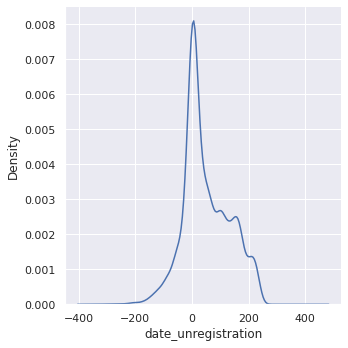

In [13]:
sns.set_theme(style="darkgrid")
sns.displot(x = 'date_unregistration', data = df_student_registration, kind="kde")
plt.show()

# need to remove the student who withdraw from the course when cleaning

# Student Assessment

In [14]:
df_student_assessment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173912 entries, 0 to 173911
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id_assessment   173912 non-null  int64  
 1   id_student      173912 non-null  int64  
 2   date_submitted  173912 non-null  int64  
 3   is_banked       173912 non-null  int64  
 4   score           173739 non-null  float64
dtypes: float64(1), int64(4)
memory usage: 6.6 MB


In [15]:
print('Number of missing entries per column:')
df_student_assessment.isnull().sum()

Number of missing entries per column:


id_assessment       0
id_student          0
date_submitted      0
is_banked           0
score             173
dtype: int64

In [16]:
df_student_vle_overall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10655280 entries, 0 to 10655279
Data columns (total 6 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   code_module        object
 1   code_presentation  object
 2   id_student         int64 
 3   id_site            int64 
 4   date               int64 
 5   sum_click          int64 
dtypes: int64(4), object(2)
memory usage: 487.8+ MB


# Preparing Data for Analysis

- Merging the data frame
- Drop the unused column (eg: id for each table)
- Transform the column into label

In [17]:
# function for merging 2 pandas dataframes

def inner_merge(left_df,right_df,right_cols,on_cols):
    right_df = right_df[right_cols]
    left_df = left_df.merge(right_df, on = on_cols)
    return left_df.drop_duplicates()

Predict a student's final result based on their early performance. 
By performance, we mean 2 things: 

**academic performance** : measured via the students' scores

**academic engagement** : measured via the number of times the students click on course content.

In [18]:
score_deadline = 90
click_deadline = 90
withdraw_deadline = 90

### Function to calculate student's average assignment score with the first score_deadline days

In [19]:
# score data

def create_score_df(score_deadline):

    df1 = df_assessment
    df2 = df_student_assessment

    score_df = inner_merge(df1,
                           df2,
                           df2.columns,
                           ['id_assessment'],
                          )

    score_df = score_df[score_df['date'] < score_deadline]

    score_df = score_df[score_df['assessment_type'] != 'Exam']

    score_df = score_df.dropna(subset = ['score']) 

    score_df.isnull().sum()

    score_df['assessment_type'].value_counts()

    score_df = score_df.groupby(['code_module', 'code_presentation', 'id_student']).mean().reset_index()
    score_df = score_df.rename(columns = {'score': f'mean_score_day{score_deadline}'})
    score_df = score_df.drop(['date', 'weight', 
                              'date_submitted', 'is_banked',
                              'id_assessment'],
                             axis = 1)
    return score_df

### Function to calculate the average number of clicks for each resource category within the first click_deadline days

In [20]:
# click data

def create_click_df(click_deadline):

    clicks = df_student_vle_overall

    clicks = inner_merge(clicks,
                         df_vle_overall,
                         ['id_site','code_module','code_presentation','activity_type'],
                         ['id_site','code_module','code_presentation'],
                        )

    clicks = clicks.drop('id_site', axis = 1)

    def clicks_xx(clicks,xx):
        temp = clicks[clicks['date'] <= xx]
        temp = temp.drop('date', axis = 1)
        temp = temp.groupby(['code_module','code_presentation','id_student','activity_type']).mean()
        temp = temp.rename(columns = {'sum_click': f'sum_click{xx} mean'})
        temp = temp.reset_index() # this fills out the missing columns for merging later 
        return temp

    click_data = pd.pivot_table(data = clicks_xx(clicks,click_deadline), 
                                index = ['code_module','code_presentation','id_student'],
                                columns = 'activity_type', 
                                values = [f'sum_click{click_deadline} mean'],
                                fill_value = 0,
                               ).reset_index()

    # get rid of multi index
    click_data = pd.concat([click_data['code_module'],
                            click_data['code_presentation'],
                            click_data['id_student'], 
                            click_data[f'sum_click{click_deadline} mean']], axis=1)
    return click_data

### Function to merge the datasets together and remove the students who withdrew before the withraw deadline.

- The final prediction is to categorize the student will **Fail** or **Pass** in the subject
Hence, Fail/Withdraw will be merged together to **Fail** category, Distinction/Pass will be merged together as **Pass**

In [21]:
# merge score_df and click_df
def create_final_df(withdraw_deadline, score_df, click_df):

    final_df = inner_merge(click_df, # merge with StudentInfo
                           df_student_info,
                           df_student_info.columns,
                           ['code_module', 'code_presentation', 'id_student'],
                          )

    final_df = final_df.replace('Distinction','Pass') # merge Pass and Distinction

    final_df = inner_merge(final_df, 
                           df_student_registration,
                           ['code_module', 'code_presentation', 'id_student', 'date_unregistration'],
                           ['code_module', 'code_presentation', 'id_student'],
                          )

    final_df = final_df[(final_df['final_result'] != 'Withdrawn') | # remove people who withdrew before withdraw_deadline
                       (final_df['date_unregistration'] > withdraw_deadline)]

    final_df = final_df.reset_index()

    final_df = final_df.drop(['date_unregistration','index'],axis = 1)

    final_df = inner_merge(final_df,
                           score_df,
                           score_df.columns,
                           ['code_module', 'code_presentation', 'id_student'])
    
    final_df = final_df.replace('Withdrawn','Fail') # merge Withdrawn to Fail

    return final_df

Call the function to create final version of data frame

In [26]:
score_df = create_score_df(score_deadline)
click_df = create_click_df(click_deadline)
final_df = create_final_df(withdraw_deadline, score_df, click_df)
final_df.head()

,code_module,code_presentation,id_student,dataplus,dualpane,externalquiz,forumng,glossary,homepage,htmlactivity,...,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,mean_score_day90
0,AAA,2013J,11391,0.0,0.0,0.0,3.514286,0.0,3.478261,0.0,...,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,81.5
1,AAA,2013J,28400,0.0,0.0,0.0,2.988889,0.0,5.194444,0.0,...,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass,69.0
2,AAA,2013J,31604,0.0,0.0,0.0,2.955882,1.0,4.340000,0.0,...,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass,71.5
3,AAA,2013J,32885,0.0,0.0,0.0,3.127660,2.0,3.600000,0.0,...,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass,49.5
4,AAA,2013J,38053,7.0,0.0,0.0,3.457364,0.0,4.438596,0.0,...,M,Wales,A Level or Equivalent,80-90%,35-55,0,60,N,Pass,74.0


Export to CSV for future use

In [51]:
final_df.to_csv('final_data.csv')

### Undergo EDA to check the status of each columnn

In [40]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23743 entries, 0 to 23742
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   code_module           23743 non-null  object 
 1   code_presentation     23743 non-null  object 
 2   id_student            23743 non-null  int64  
 3   dataplus              23743 non-null  float64
 4   dualpane              23743 non-null  float64
 5   externalquiz          23743 non-null  float64
 6   forumng               23743 non-null  float64
 7   glossary              23743 non-null  float64
 8   homepage              23743 non-null  float64
 9   htmlactivity          23743 non-null  float64
 10  oucollaborate         23743 non-null  float64
 11  oucontent             23743 non-null  float64
 12  ouelluminate          23743 non-null  float64
 13  ouwiki                23743 non-null  float64
 14  page                  23743 non-null  float64
 15  questionnaire      

Check the unique values of each column:

In [42]:
total_student_before_dropout = len(df_student_info['id_student'].unique())
print('Total number of student: '+str(total_student_before_dropout)+'\n')

total_student = len(final_df['id_student'].unique())
print('Total number of student: '+str(total_student)+'\n')

result_category = final_df['final_result'].unique()
print('Result Category: ')
print(result_category)
print('\n')

student_education_level = final_df['highest_education'].unique()
print('Education level: ')
print(student_education_level)
print('\n')

module = final_df['code_module'].unique()
print('Module Code : ')
print(module)
print('\n')

student_presentation = final_df['code_presentation'].unique()
print('Presentation Code : ')
print(student_presentation)
print('\n')

Total number of student: 28785

Total number of student: 21823

Result Category: 
['Pass' 'Fail']


Education level: 
['HE Qualification' 'A Level or Equivalent' 'Lower Than A Level'
 'Post Graduate Qualification' 'No Formal quals']


Module Code : 
['AAA' 'BBB' 'CCC' 'DDD' 'EEE' 'FFF' 'GGG']


Presentation Code : 
['2013J' '2014J' '2013B' '2014B']




After remove the student who dropout of courses before the courses start, the **number of student reduce from 28785 to 21823**

But the total record is 23743 as there have student that take more than one courses at the same time

Number of student for each course module

In [43]:
module_enrol = final_df.groupby('code_module').agg({'id_student':'count'}).reset_index().rename(columns={"code_module":"Module",'id_student':'quantity'})
module_enrol['Percentage'] = module_enrol.apply(lambda x:round(100*(x['quantity']/module_enrol['quantity'].sum()),2),axis=1)

fig_module = px.bar(module_enrol,x='Module',y="quantity",text = 'Percentage',color = 'Module',hover_data=['quantity'],template="seaborn")

fig_module.update_layout(
    margin=dict(l=20, r=50, t=50, b=20),
    title = 'Course Module Distribution among '+str(total_student)+' student',
    xaxis_title="Module",
    yaxis_title="Quantity of student",
    legend_title="Module",
    width=600, 
    height=400,
    uniformtext_minsize=10, 
    uniformtext_mode='hide',
)

fig_module

Result of students in each module

In [44]:
result =  final_df.groupby(['code_module','final_result']).agg({'id_student':'count'}).reset_index().rename(columns={'code_module': 'module','final_result':'result','id_student':'quantity'})

result['percentage'] = result.apply(lambda x:round(100*(x['quantity']/result[result['result'] ==x['result']]['quantity'].sum()),2), axis=1)

fig_result = px.bar(result,x="result",y='percentage',text='percentage',color='module',hover_data = ['percentage'],barmode='stack',template="plotly")

fig_result.update_layout(
    margin=dict(l=20, r=50, t=50, b=20),
    title = 'Result of student in each module',
    xaxis_title="Result",
    yaxis_title="Percentual [%]",
    legend_title="Module",
    width=700, 
    height=500,
    uniformtext_minsize=9, 
    uniformtext_mode='hide',
)
fig_result

Educational level of each student

In [45]:
education_level =  df_student_info.groupby(['code_module','highest_education']).agg({'id_student':'count'}).reset_index().rename(columns={'code_module': 'module','highest_education':'Education level','id_student':'quantity'})

education_level['percentage'] = education_level.apply(lambda x:round(100*(x['quantity']/education_level[education_level['Education level'] ==x['Education level']]['quantity'].sum()),2), axis=1)

education_level = px.bar(education_level,x="Education level",y='percentage',text='percentage',color='module',hover_data = ['percentage'],barmode='stack',template="plotly")

education_level.update_layout(
    margin=dict(l=20, r=50, t=50, b=20),
    title = 'Education Level among students',
    xaxis_title="Education level",
    yaxis_title="Percentual [%]",
    legend_title="Module",
    width=700, 
    height=500,
    uniformtext_minsize=9, 
    uniformtext_mode='hide',
)
education_level

Education level analysis

In [46]:
education_level_definition = final_df.groupby('highest_education').agg({'id_student':'count'}).reset_index().rename(columns={"highest_education": "Education level",'id_student': 'quantity'}).sort_values(by='quantity', ascending=False)

education_level_definition['percentage'] = education_level_definition.apply(lambda x: round(100 * (x['quantity'] / education_level_definition['quantity'].sum()), 2) ,axis=1)

fig_edu = px.bar(education_level_definition, x='Education level', y='quantity', text='percentage', color='Education level', template="plotly")
fig_edu.update_layout(
    margin=dict(l=20, r=50, t=50, b=20),
    title = 'Education Level among students',
    xaxis_title="Education level",
    yaxis_title="Quantity of student",
    legend_title="Education level",
    width=800, 
    height=550,
    uniformtext_minsize=9, 
    uniformtext_mode='hide',
)
fig_edu.show()

Check the total fail and total pass 

In [31]:
df_combine = final_df[final_df['code_module'].isin (['FFF','BBB'])]

df_combine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11447 entries, 680 to 21728
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   code_module           11447 non-null  object 
 1   code_presentation     11447 non-null  object 
 2   id_student            11447 non-null  int64  
 3   dataplus              11447 non-null  float64
 4   dualpane              11447 non-null  float64
 5   externalquiz          11447 non-null  float64
 6   forumng               11447 non-null  float64
 7   glossary              11447 non-null  float64
 8   homepage              11447 non-null  float64
 9   htmlactivity          11447 non-null  float64
 10  oucollaborate         11447 non-null  float64
 11  oucontent             11447 non-null  float64
 12  ouelluminate          11447 non-null  float64
 13  ouwiki                11447 non-null  float64
 14  page                  11447 non-null  float64
 15  questionnaire    

In [32]:
df_combine.head()

,code_module,code_presentation,id_student,dataplus,dualpane,externalquiz,forumng,glossary,homepage,htmlactivity,...,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,mean_score_day90
680,BBB,2013B,23629,0.0,0.0,0.0,3.863636,0.0,2.250000,0.0,...,F,East Anglian Region,Lower Than A Level,20-30%,0-35,2,60,N,Fail,82.5
681,BBB,2013B,25107,0.0,0.0,0.0,4.989474,2.0,3.276596,0.0,...,F,East Anglian Region,Lower Than A Level,20-30%,0-35,0,120,N,Pass,76.4
682,BBB,2013B,27891,0.0,0.0,0.0,3.363636,0.0,3.500000,0.0,...,M,Scotland,Lower Than A Level,0-10%,0-35,2,120,Y,Fail,71.0
683,BBB,2013B,29144,0.0,0.0,0.0,3.324675,1.0,5.000000,0.0,...,M,South Region,Lower Than A Level,60-70%,0-35,0,120,N,Fail,77.0
684,BBB,2013B,31663,0.0,0.0,0.0,4.589928,1.0,7.768421,0.0,...,M,North Region,A Level or Equivalent,30-40%,35-55,0,60,N,Pass,86.6


## Transform all the column in to label

In [ ]:
labelEncoder = LabelEncoder()
df_final['region_label'] = labelEncoder.fit_transform(df_final['region'])

# Print the value of label with its respective label
region = df_final['region'].unique()
print(region)
print('\n')
region_label = df_final['region_label'].unique()
print(region_label)


['South East Region' 'Wales' 'South West Region' 'West Midlands Region'
 'South Region' 'Ireland' 'London Region' 'North Region'
 'East Midlands Region' 'North Western Region' 'Scotland'
 'Yorkshire Region' 'East Anglian Region']


[ 7 10  9 11  8  2  3  4  1  5  6 12  0]


In [ ]:
df_final['education_label'] = labelEncoder.fit_transform(df_final['highest_education'])

# Print the value of label with its respective label
education_label = df_final['education_label'].unique()
print(education_label)
print('\n')
highest_education = df_final['highest_education'].unique()
print(highest_education)

[0 2 1 3 4]


['A Level or Equivalent' 'Lower Than A Level' 'HE Qualification'
 'No Formal quals' 'Post Graduate Qualification']


In [ ]:
df_final.head(5)

,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,id_assessment,score,assessment_type,weight,module_presentation_length,region_label,education_label
0,F,South East Region,A Level or Equivalent,30-40%,0-35,0,60,N,Distinction,34860.0,86.0,TMA,12.5,240,7,0
1,F,South East Region,A Level or Equivalent,30-40%,0-35,0,60,N,Distinction,34860.0,86.0,TMA,12.5,240,7,0
2,F,South East Region,A Level or Equivalent,30-40%,0-35,0,60,N,Distinction,34860.0,86.0,TMA,12.5,240,7,0
3,F,South East Region,A Level or Equivalent,30-40%,0-35,0,60,N,Distinction,34861.0,94.0,TMA,12.5,240,7,0
4,F,South East Region,A Level or Equivalent,30-40%,0-35,0,60,N,Distinction,34861.0,94.0,TMA,12.5,240,7,0


In [ ]:
df_final['education_label'] = labelEncoder.fit_transform(df_final['highest_education'])

# Print the value of label with its respective label
education_label = df_final['education_label'].unique()
print(education_label)
print('\n')
highest_education = df_final['highest_education'].unique()
print(highest_education)

Function to create the train and test model (To be moved when needed in modelling)

In [33]:
def create_Xy(final_df):

    X = final_df.drop(['final_result','id_student','imd_band'],axis = 1)
    column_names = X.columns
    y = final_df['final_result']

    le = LabelEncoder()
    encode_dict = {}
    Xcat_features = ['code_module', 'code_presentation',
                    'gender', 'region',
                    'highest_education',  
                    'age_band','disability',
                   ]

    for cat_feature in Xcat_features: 
        X[cat_feature] = le.fit_transform(X[cat_feature])
        encode_dict[cat_feature] = le.classes_

    y = le.fit_transform(y)
    encode_dict['final_result'] = le.classes_

    X = X.to_numpy()
    
    return X,y,column_names,encode_dict

In [34]:
X,y,column_names,encode_dict = create_Xy(df_combine)

In [36]:
print(X)

[[  0.    0.    0.  ...  60.    0.   82.5]
 [  0.    0.    0.  ... 120.    0.   76.4]
 [  0.    0.    0.  ... 120.    1.   71. ]
 ...
 [  1.    3.    0.  ... 120.    0.   89. ]
 [  1.    3.    0.  ...  60.    0.   67. ]
 [  1.    3.    0.  ...  60.    0.   83. ]]


In [37]:
print(encode_dict)

{'code_module': array(['BBB', 'FFF'], dtype=object), 'code_presentation': array(['2013B', '2013J', '2014B', '2014J'], dtype=object), 'gender': array(['F', 'M'], dtype=object), 'region': array(['East Anglian Region', 'East Midlands Region', 'Ireland',
       'London Region', 'North Region', 'North Western Region',
       'Scotland', 'South East Region', 'South Region',
       'South West Region', 'Wales', 'West Midlands Region',
       'Yorkshire Region'], dtype=object), 'highest_education': array(['A Level or Equivalent', 'HE Qualification', 'Lower Than A Level',
       'No Formal quals', 'Post Graduate Qualification'], dtype=object), 'age_band': array(['0-35', '35-55', '55<='], dtype=object), 'disability': array(['N', 'Y'], dtype=object), 'final_result': array(['Fail', 'Pass'], dtype=object)}
